<a href="https://colab.research.google.com/github/MariiaKalinina/BM/blob/main/Pore_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [ ]:
def hydrostatic_pressure_single(depth, sea_level, sediment_surface, water_depth, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.

    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)

    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)

    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]

    # Convert pressure to MPa and return
    return pressure / 1e6


def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.

    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².

    Returns:
        float: Lithostatic pressure for the given layer (Pa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity))/1e6


[   0 1000 2000 2002 4000 5000]
5
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.202399999999999, Lithostatic Pressure = 19.810314
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.404799999999998, Lithostatic Pressure = 42.208506
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.425204799999996, Lithostatic Pressure = 42.266398734
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.809599999999996, Lithostatic Pressure = 85.700840814
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01199999999999, Lithostatic Pressure = 110.73596081400001


<ipython-input-26-220d9ae0556e>:26: RuntimeWarning: invalid value encountered in log
  'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)


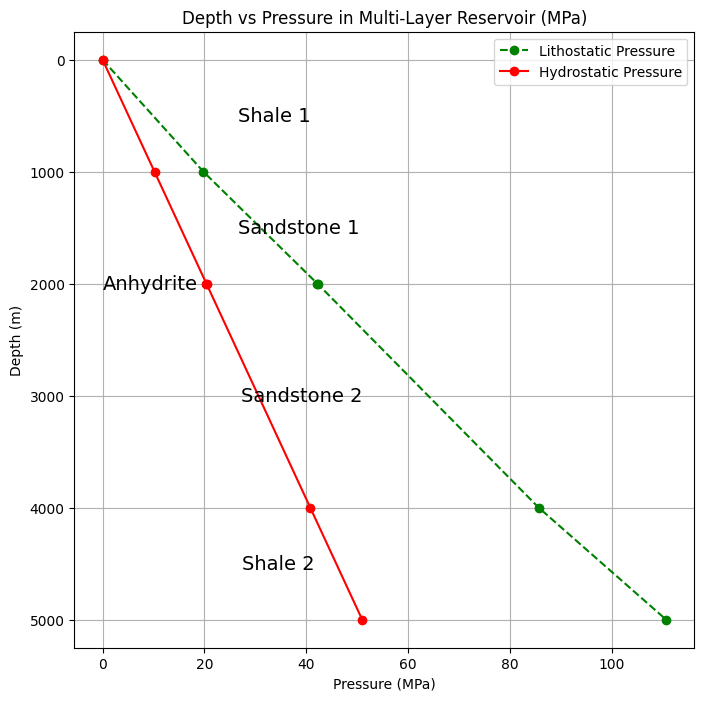

In [ ]:
# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
# layer_thicknesses = np.array([1000, 1000, 1000, 1000, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}


P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_finall = np.zeros(num_layers)
print(num_layers)
depths_new = depths[1::]

SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL

lith_final = 0  # Start with zero lithostatic pressure at the surface
for i in range(num_layers):
    print('Calculating pressures for layer:', i)

    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=1040
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=1040,
        g=9.81
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]}, Lithostatic Pressure = {lith_pres[i]}")


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)



# print(lithostatic_pressure, hydrostatic_pressure)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8
                    ))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1001, 1000, 2, 1016, 1023, 1010])  # Layer thicknesses in meters
# layer_thicknesses = np.array([1000, 1000, 1000, 1000, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layera
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2-1', 'Sandstone 2-2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.4173, 0.2688, 0.01, 0.3492, 0.2575, 0.1064]),  # Porosity
    'k': np.array([np.power(10.0, -2.26), np.power(10.0, 3.16), np.power(10.0, -16), np.power(10.0, 3.86), np.power(10.0, 3.06), np.power(10.0, -6.3)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.0666, 0.001, 0.0981, 0.0627, 0.055]),  # Compressibility (1/Pa)
}


P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_finall = np.zeros(num_layers)
print(num_layers)
depths_new = depths[1::]

SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL

lith_final = 0  # Start with zero lithostatic pressure at the surface
for i in range(num_layers):
    print('Calculating pressures for layer:', i)

    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=1040
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=1040,
        g=9.81
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]}, Lithostatic Pressure = {lith_pres[i]}")


# Time parameters for pressure calculation (You can adjust these)
Myr = 1
myr_to_sec = Myr * 31557600000000
time_step = 1e5  # Time step (s)
# total_time = 1e6  # Total time (s)
total_time = myr_to_sec
num_steps = int(total_time / time_step)
print(num_steps)

parameters['P_l'] = P_l

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)


# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        # P[i] += dP_dt * time_step
        P[i] += dP_dt * time_step
        # print(i, dP_dt, time_step)

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure

# Function to calculate overpressure as a scalar
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Initialize overpressure array
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure

for i in range(num_layers):
    # Calculate hydrostatic pressure for each layer
    # P_overburden = hydrostatic_pressure_single(depths[i], sea_level=SEA_LEVEL, sediment_surface=SEDIMENT_SURFACE,
    #                                            water_depth=WATER_DEPTH, rho_water=1040)

    P_overburden = calculate_lithostatic_pressure_single(layer_thicknesses[i],rock_densities[i],parameters['phi'][i],
                                                         rho_water=1040, g=9.81)


    # Ensure the calculate_overpressure function returns a scalar and assign it to overpressure
    overpressure[i+1] = calculate_overpressure(parameters['P_l'][i], P_overburden)

# Convert pressures to MPa (1 MPa = 1e6 Pa)
# overpressure /= 1e6
print(overpressure)


# Plot the depth vs overpressure
plt.figure(figsize=(8, 8))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()

[   0 1001 2001 2003 3019 4042 5052]
6
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.4173, Hydrostatic Pressure = 10.212602399999998, Lithostatic Pressure = 19.711127856420003
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.2688, Hydrostatic Pressure = 20.415002399999995, Lithostatic Pressure = 41.96428881642001
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.435407199999997, Lithostatic Pressure = 42.02218155042001
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3492, Hydrostatic Pressure = 30.801045599999995, Lithostatic Pressure = 63.285135864660006
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.2575, Hydrostatic Pressure = 41.23810079999999, Lithostatic Pressure = 86.24063592666
Calculating pressures for layer: 5
Layer 5: Rock Density = 2720, Porosity = 0.1064, Hydrostatic Pressure = 51.54252479999999,

<ipython-input-109-6265fcf2635f>:111: RuntimeWarning: overflow encountered in scalar multiply
  dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate
<ipython-input-109-6265fcf2635f>:115: RuntimeWarning: overflow encountered in scalar add
  P[i] += dP_dt * time_step


KeyboardInterrupt: 

Calculating pressures for layer: 0
Calculating pressures for layer: 1
Calculating pressures for layer: 2
Calculating pressures for layer: 3
Calculating pressures for layer: 4
Calculating pressures for layer: 5


(array([ 0.       , 10.2126024, 20.4150024, 20.4354072, 30.8010456,
        41.2381008, 51.5425248]),
 array([  0.        ,  19.71112786,  41.96428882,  42.02218155,
         63.28513586,  86.24063593, 111.41957524]))

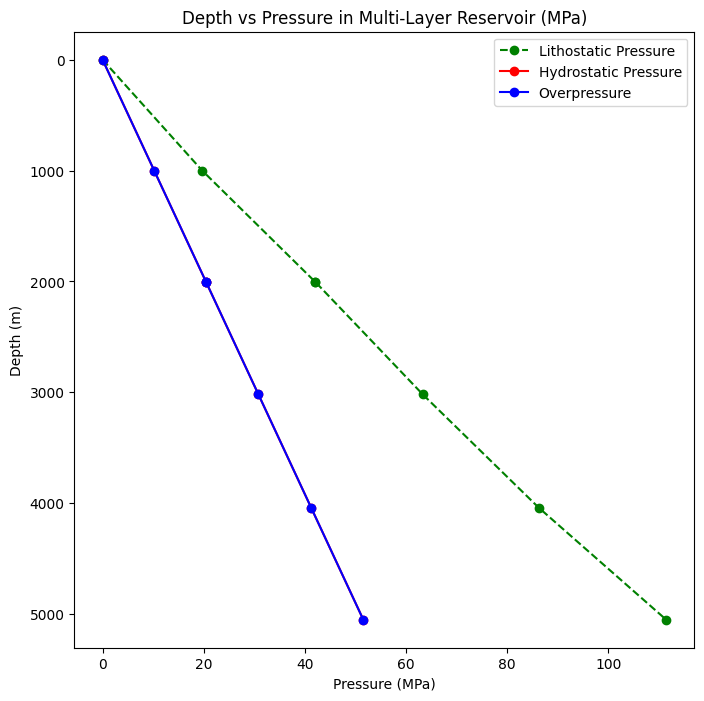

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1001, 1000, 2, 1016, 1023, 1010])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2-1', 'Sandstone 2-2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1040  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
parameters = {
    'phi': np.array([0.4173, 0.2688, 0.01, 0.3492, 0.2575, 0.1064]),  # Porosity
    'k': np.array([np.power(10.0, -2.26), np.power(10.0, 3.16), np.power(10.0, -16), np.power(10.0, 3.86), np.power(10.0, 3.06), np.power(10.0, -6.3)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.0666, 0.001, 0.0981, 0.0627, 0.055]),  # Compressibility (1/Pa)
}

# Initialize pressure arrays
P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Lithostatic pressure (Pa)
hydro_pres = np.zeros(num_layers)  # Hydrostatic pressure (Pa)
overpressure = np.zeros(num_layers + 1)  # Overpressure profile (Pa)


SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL


lith_final = 0  # Start with zero lithostatic pressure at the surface
for i in range(num_layers):
    print('Calculating pressures for layer:', i)

    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=1040
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=1040,
        g=9.81
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer


    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

# Initialize pressure array P (Pa) for each layer, assuming equilibrium
P = np.zeros(num_layers)

# Time-stepping loop (if needed for evolution or transient behavior)
# For this model, let's assume it's not required, so we won't use it for now.
# Time-stepping loop to update pressure in each layer based on the equation
time_step = 1e2  # Time step (s)
total_time = 1e0  # Total time (s)
num_steps = int(total_time / time_step)

# Calculate overpressure for each layer
for i in range(num_layers):

  #  P_overburden =calculate_lithostatic_pressure_single(
  #       layer_thicknesses[i],
  #       rock_densities[i],
  #       parameters['phi'][i],
  #       rho_water=1040,
  #       g=9.81
  #   )

  #  P_overburden +=hydrostatic_pressure_single(
  #       depths_new[i],
  #       sea_level=SEA_LEVEL,
  #       sediment_surface=SEDIMENT_SURFACE,
  #       water_depth=WATER_DEPTH,
  #       rho_water=1040
  #   )

   P_overburden = lith_pres
  #  P_l[i] = lith_pres[i]
   overpressure[i + 1] = P_overburden[i] - P_l[i]
    # Calculate the hydrostatic pressure at the current depth
    # P_overburden = lith_pres[i]

    # P_overburden = hydrostatic_pressure_single(
    #     depths_new[i],
    #     sea_level=SEA_LEVEL,
    #     sediment_surface=SEDIMENT_SURFACE,
    #     water_depth=WATER_DEPTH,
    #     rho_water=1040
    # )

    # Calculate overpressure using P_l and P_overburden (lithostatic potential + overburden)
    # print(hydro_pres[i], P_l[i], lith_pres[i], P_overburden - P_l[i])



# Convert pressures to MPa (1 MPa = 1e6 Pa)
# lith_pres /= 1e6
# hydro_pres /= 1e6
# overpressure /= 1e6

# Plot the depth vs pressures (MPa)
plt.figure(figsize=(8, 8))

# Insert surface pressure (0 at the surface)
lith_pres = np.insert(lith_pres, 0, 0)
hydro_pres = np.insert(hydro_pres, 0, 0)


# Plot lithostatic, hydrostatic, and overpressure curves
plt.plot(lith_pres, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydro_pres, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')
plt.legend()

# Add labels and title
plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

# Annotate each layer with its name
top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate the layer
overpressure, lith_pres

The general form of the pore pressure equation is:

$[
\left( 1 - \frac{\varphi}{C} \right) \frac{\partial u}{\partial t} - \nabla \left( \frac{k}{\mu} \right) \cdot \nabla u = \left( 1 - \frac{\varphi}{C} \right) \frac{\partial u_l}{\partial t}
]$

Where:
- \( u \) is the pore pressure,
- \( $\phi$) is the porosity,
- \( C \) is the compaction coefficient,
- \( k \) is the permeability of the rock,
- \( $\mu$ ) is the fluid mobility (\( \mu = \frac{k}{\nu} \)),
- \( $\nu$ ) is the kinematic viscosity of the fluid,
- \( $u_l$ ) is the lithostatic pressure minus the hydrostatic pressure.

The first term on the left-hand side of the equation represents the rate of change of pore pressure due to compaction effects. The second term is the Darcy flux, which models fluid flow based on the pressure gradient. The right-hand side accounts for the time rate of change of the lithostatic pressure over the hydrostatic pressure, ( $u_l$).


In [ ]:
# Conversion factor
seconds_per_year = 31_557_600  # seconds in one year
seconds_in_million_years = 31_557_600 * 1_000_000  # seconds in one million years

def seconds_to_million_years(seconds):
    return seconds / seconds_in_million_years

# Example usage:
seconds = 1e20  # Example: 1 trillion seconds
millions_of_years = seconds_to_million_years(seconds)
print(f"{seconds} seconds is approximately {millions_of_years/1e6} Ma.")


1e+20 seconds is approximately 3.168808781402895 Ma.


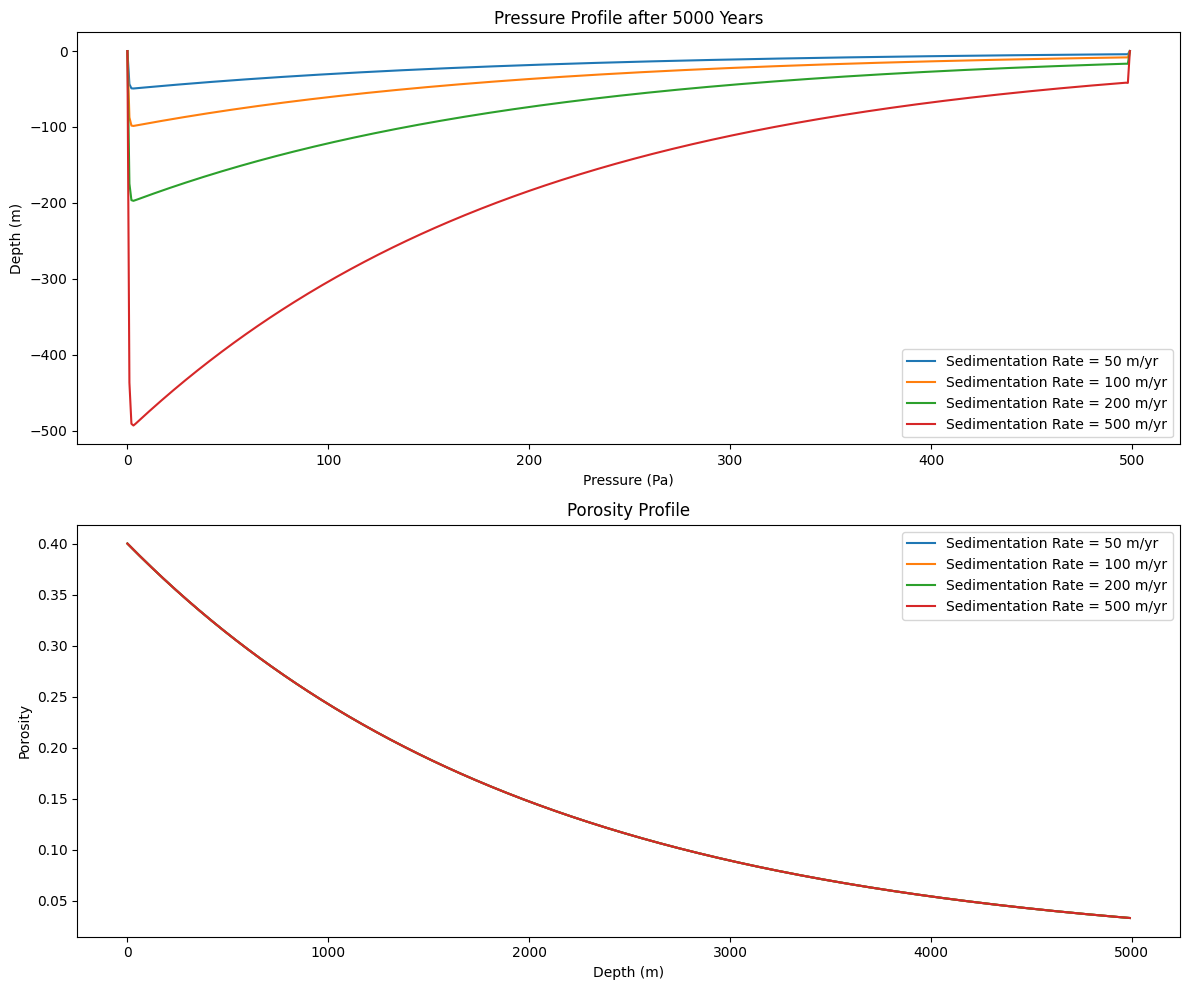

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Constants and initial conditions
k_silt = 1e-6  # Initial permeability (siltstone)
nu = 1e-3  # Kinematic viscosity (m^2/s)

# Depth range (1D model)
z_max = 5000  # Maximum depth in meters
dz = 10  # Depth resolution in meters
depths = np.arange(0, z_max, dz)

# Time range
t_max = 5000  # Maximum time in years
dt = 10  # Time step in years
time_steps = int(t_max / dt)

# Initial porosity and permeability as functions of depth
def porosity(depth):
    return 0.4 * np.exp(-depth / 2000)  # Exponential decay with depth for porosity

def permeability(depth, rock_type="siltstone"):
    if rock_type == "siltstone":
        return k_silt * np.exp(-depth / 2000)  # Siltstone: slower permeability decrease

# Initialize arrays
pressure_siltstone = np.zeros((time_steps, len(depths)))
porosity_siltstone = np.zeros(len(depths))
permeability_siltstone = np.zeros(len(depths))

# Set initial porosity and permeability profiles
for i, depth in enumerate(depths):
    porosity_siltstone[i] = porosity(depth)
    permeability_siltstone[i] = permeability(depth, rock_type="siltstone")

# Time-stepping loop to solve for pressure using finite differences
def solve_pressure(pressure, porosity, permeability, sed_rate):
    # Loop over time steps
    for t in range(1, time_steps):
        # Loop over depth
        for z in range(1, len(depths)-1):
            # Calculate spatial derivatives (pressure gradient)
            dP_dz = (pressure[t-1, z+1] - pressure[t-1, z-1]) / (2 * dz)

            # Darcy term: rate of fluid movement due to pressure gradient
            darcy_flux = -(permeability[z] / nu) * dP_dz

            # Porosity term: accounts for sediment compaction or fluid migration
            # Here, we're using porosity and sediment rate to adjust for compaction.
            compaction_term = sed_rate * (porosity[z] - porosity[z-1]) / dz  # Compaction effect

            # Time derivative: rate of pressure change at a given depth
            dP_dt = darcy_flux + compaction_term

            # Update the pressure at this depth and time step
            pressure[t, z] = pressure[t-1, z] + dt * dP_dt

# List of sedimentation rates to test
sed_rates = [50, 100, 200, 500]

# Plot setup
plt.figure(figsize=(12, 10))

# Loop through each sedimentation rate and solve for pressure
for i, sed_rate in enumerate(sed_rates):
    # Reset pressure profile for each rate
    pressure_siltstone = np.zeros((time_steps, len(depths)))

    # Solve pressure for this sedimentation rate
    solve_pressure(pressure_siltstone, porosity_siltstone, permeability_siltstone, sed_rate)

    # Plot the results for pressure and porosity
    plt.subplot(2, 1, 1)
    plt.plot(pressure_siltstone[-1],  label=f'Sedimentation Rate = {sed_rate} m/yr')

    plt.subplot(2, 1, 2)
    plt.plot(depths, porosity_siltstone, label=f'Sedimentation Rate = {sed_rate} m/yr')

# Pressure plot
plt.subplot(2, 1, 1)
plt.ylabel('Depth (m)')
# plt.gca().invert_yaxis()  # Invert y-axis for depth
plt.xlabel('Pressure (Pa)')
plt.title('Pressure Profile after {} Years'.format(t_max))
plt.legend()

# Porosity plot
plt.subplot(2, 1, 2)
plt.xlabel('Depth (m)')
plt.ylabel('Porosity')
plt.title('Porosity Profile')
plt.legend()

plt.tight_layout()
plt.show()


[   0 1000 2000 2002 4000 5000]
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.20 MPa, Lithostatic Pressure = 19.81 MPa
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.40 MPa, Lithostatic Pressure = 42.21 MPa
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.43 MPa, Lithostatic Pressure = 42.27 MPa
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.81 MPa, Lithostatic Pressure = 85.70 MPa
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01 MPa, Lithostatic Pressure = 110.74 MPa


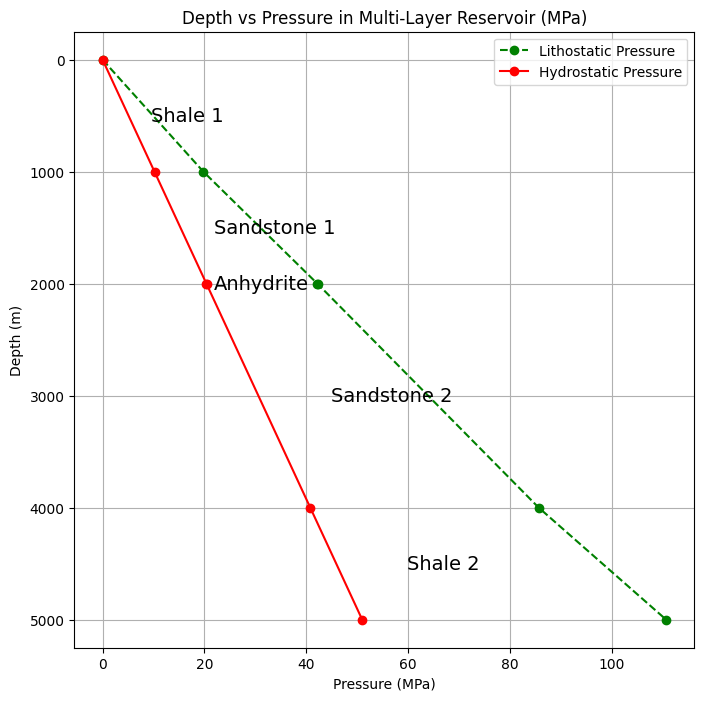

In [5]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s²)

# Given data
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses
# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)
print(depths)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer
# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1040  # Fluid density (kg/m³) - changed to match function parameter

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}

P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_final = 0  # Start with zero lithostatic pressure at the surface

# Functions for pressure calculations
def hydrostatic_pressure_single(depth, sea_level=0, sediment_surface=0, water_depth=0, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.
    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)
    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)
    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]
    # Convert pressure to MPa and return
    return pressure / 1e6

def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.
    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².
    Returns:
        float: Lithostatic pressure for the given layer (MPa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity)) / 1e6

# Depths excluding the surface depth (0m)
depths_new = depths[1:]

# Set constants for water depth calculation
SEA_LEVEL = 0
SEDIMENT_SURFACE = 0
if SEDIMENT_SURFACE >= 0:
    WATER_DEPTH = SEDIMENT_SURFACE
else:
    WATER_DEPTH = SEA_LEVEL

for i in range(num_layers):
    print('Calculating pressures for layer:', i)
    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=fluid_density
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=fluid_density,
        g=g
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]:.2f} MPa, Lithostatic Pressure = {lith_pres[i]:.2f} MPa")

# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

# Annotate each layer with its name
top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    # Modified to use P_l[i] instead of P_l[i+1]
    plt.text(P_l[i], depth, name, ha='left', va='center', fontsize=14, color='black')
# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()

[   0 1000 2000 2002 4000 5000]
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.20 MPa, Lithostatic Pressure = 19.81 MPa, Pore Pressure = 10.20 MPa, Effective Stress = 9.61 MPa
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.40 MPa, Lithostatic Pressure = 42.21 MPa, Pore Pressure = 20.40 MPa, Effective Stress = 21.80 MPa
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.43 MPa, Lithostatic Pressure = 42.27 MPa, Pore Pressure = 20.43 MPa, Effective Stress = 21.84 MPa
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.81 MPa, Lithostatic Pressure = 85.70 MPa, Pore Pressure = 40.81 MPa, Effective Stress = 44.89 MPa
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01 MPa, Lithostatic Pressure = 110.74 M

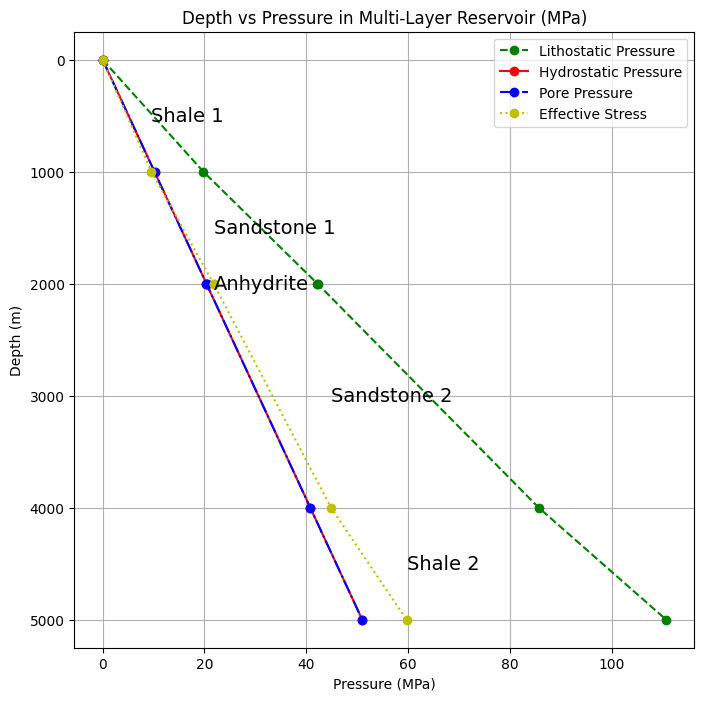

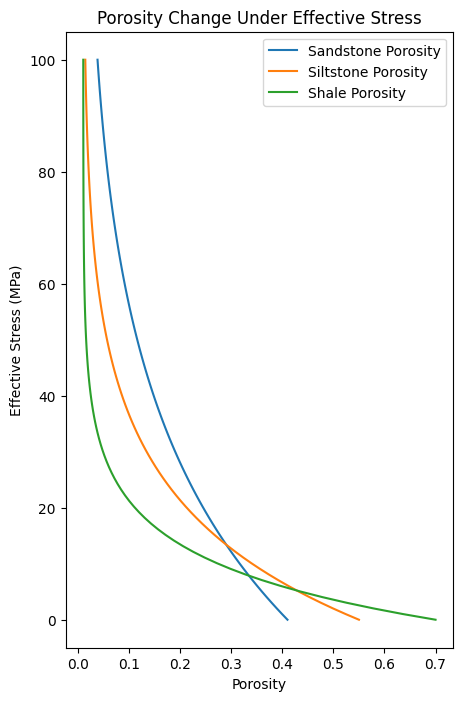

In [6]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s²)

# Given data
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses
# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)
print(depths)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer
# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1040  # Fluid density (kg/m³) - changed to match function parameter

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}

P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
pore_pres = np.zeros(num_layers)  # Pore pressure
effective_stress = np.zeros(num_layers)  # Effective stress
lith_final = 0  # Start with zero lithostatic pressure at the surface

# Functions for pressure calculations
def hydrostatic_pressure_single(depth, sea_level=0, sediment_surface=0, water_depth=0, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.
    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)
    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)
    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]
    # Convert pressure to MPa and return
    return pressure / 1e6

def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.
    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².
    Returns:
        float: Lithostatic pressure for the given layer (MPa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity)) / 1e6

# Depths excluding the surface depth (0m)
depths_new = depths[1:]

# Set constants for water depth calculation
SEA_LEVEL = 0
SEDIMENT_SURFACE = 0
if SEDIMENT_SURFACE >= 0:
    WATER_DEPTH = SEDIMENT_SURFACE
else:
    WATER_DEPTH = SEA_LEVEL

for i in range(num_layers):
    print('Calculating pressures for layer:', i)
    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=fluid_density
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=fluid_density,
        g=g
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    # Assume pore pressure is equal to hydrostatic pressure for simplicity
    pore_pres[i] = hydro_pres[i]

    # Calculate effective stress
    effective_stress[i] = lith_pres[i] - pore_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]:.2f} MPa, Lithostatic Pressure = {lith_pres[i]:.2f} MPa, "
          f"Pore Pressure = {pore_pres[i]:.2f} MPa, Effective Stress = {effective_stress[i]:.2f} MPa")

# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)
pore_pressure = np.insert(pore_pres, 0, 0)
effective_stress_plot = np.insert(effective_stress, 0, 0)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8))

# Plot lithostatic, hydrostatic, pore pressure, and effective stress for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(pore_pressure, depths, linestyle='-.', color='b', label='Pore Pressure', marker='o')
plt.plot(effective_stress_plot, depths, linestyle=':', color='y', label='Effective Stress', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

# Annotate each layer with its name
top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    # Modified to use P_l[i] instead of P_l[i+1]
    plt.text(P_l[i], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Function to calculate porosity change under effective stress
def arty_model_porosity(sigma_z_array, phi0, phi_m, k):
    return [phi_m + (phi0 - phi_m) * np.exp(-k * sigma_z) for sigma_z in sigma_z_array]

# Example lithology data
sandstone = {'porosity initial': 0.41, 'k': 0.0266}
siltstone = {'porosity initial': 0.55, 'k': 0.049}
shale = {'porosity initial': 0.70, 'k': 0.096}

# List of lithology types
lithology_types = ['sandstone', 'siltstone', 'shale']

# Prepare the plot
plt.figure(figsize=(5, 8))

# Effective stress array
sigma_z_array = np.linspace(0., 100, 100)  # Effective stress in MPa
phi_m = 0.01  # Minimum porosity

# Iterate through each lithology type and calculate porosity
for lithology in lithology_types:
    if lithology == 'sandstone':
        phi0 = sandstone['porosity initial']
        k = sandstone['k']
    elif lithology == 'siltstone':
        phi0 = siltstone['porosity initial']
        k = siltstone['k']
    elif lithology == 'shale':
        phi0 = shale['porosity initial']
        k = shale['k']
    # Calculate effective porosity for the current lithology
    porosity_effective = arty_model_porosity(sigma_z_array, phi0, phi_m, k)
    plt.plot(porosity_effective, sigma_z_array, label=f'{lithology.capitalize()} Porosity')

plt.xlabel('Porosity')
plt.ylabel('Effective Stress (MPa)')
plt.title('Porosity Change Under Effective Stress')
plt.legend()
plt.show()

[   0 1000 2000 2002 4000 5000]
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.20 MPa, Lithostatic Pressure = 19.81 MPa
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.40 MPa, Lithostatic Pressure = 42.21 MPa
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.43 MPa, Lithostatic Pressure = 42.27 MPa
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.81 MPa, Lithostatic Pressure = 85.70 MPa
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01 MPa, Lithostatic Pressure = 110.74 MPa
Calculating pressures for layer: 0
Calculating pressures for layer: 1
Calculating pressures for layer: 2
Calculating pressures for layer: 3
Calculating pressures for layer: 4
[6.56053789e-01 8.60788095e-01 4.24849524e+16 7.2

AttributeError: 'numpy.ndarray' object has no attribute 'items'

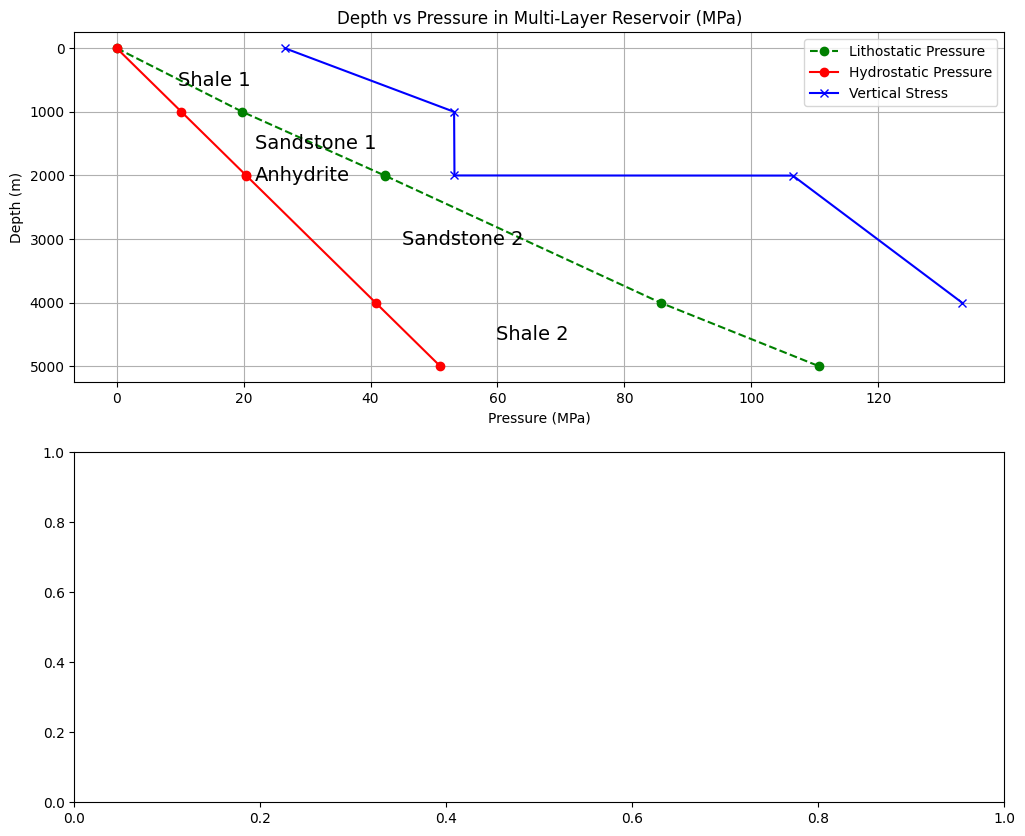

In [9]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s²)

# Given data
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses
# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)
print(depths)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer
# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1040  # Fluid density (kg/m³) - changed to match function parameter

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}

P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_final = 0  # Start with zero lithostatic pressure at the surface

# Functions for pressure calculations
def hydrostatic_pressure_single(depth, sea_level=0, sediment_surface=0, water_depth=0, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.
    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)
    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)
    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]
    # Convert pressure to MPa and return
    return pressure / 1e6

def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.
    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².
    Returns:
        float: Lithostatic pressure for the given layer (MPa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity)) / 1e6

def arty_model(phi, phi0, k):
    if phi0 <= 0 or k <= 0:
        raise ValueError("phi0 and k must be positive values.")
    return - (1 / k) * np.log(phi / phi0)

# Depths excluding the surface depth (0m)
depths_new = depths[1:]

# Set constants for water depth calculation
SEA_LEVEL = 0
SEDIMENT_SURFACE = 0
if SEDIMENT_SURFACE >= 0:
    WATER_DEPTH = SEDIMENT_SURFACE
else:
    WATER_DEPTH = SEA_LEVEL

for i in range(num_layers):
    print('Calculating pressures for layer:', i)
    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=fluid_density
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=fluid_density,
        g=g
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]:.2f} MPa, Lithostatic Pressure = {lith_pres[i]:.2f} MPa")

# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)

# Calculate vertical stress for each layer
vertical_stress = np.zeros(num_layers)
for i in range(num_layers):
    vertical_stress[i] = np.sum(rock_densities[:i+1] * g * layer_thicknesses[:i+1]) / 1e6

# Calculate effective stress using Artzy model

effective_stress = np.zeros(num_layers)
phi0=0.7

for i in range(num_layers):
    print('Calculating pressures for layer:', i)
    # Calculate hydrostatic pressure for the current layer
    effective_stress[i] = arty_model(parameters['phi'][i],
                                     phi0,
                                     parameters['k'][i])

print(effective_stress)
# Prepare the plot
plt.figure(figsize=(12, 10))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.subplot(2, 1, 1)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(vertical_stress, depths[:-1], linestyle='-', color='b', label='Vertical Stress', marker='x')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward
# Annotate each layer with its name
top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(P_l[i], depth, name, ha='left', va='center', fontsize=14, color='black')
plt.grid(True)
plt.legend(loc='best')

# Plotting effective stress against porosity in linear scale
plt.subplot(2, 1, 2)
for lithology, stress in effective_stress.items():
    plt.plot(stress, phi_array, label=f'{lithology.capitalize()}')
plt.title('Effective Stress vs Porosity (Linear Scale)')
plt.ylabel('Porosity (φ)')
plt.xlabel('Effective Stress (MPa)')
plt.xlim(0, 60)
plt.ylim(0, 0.7)
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

[   0 1000 2000 2002 4000 5000]
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.20 MPa, Lithostatic Pressure = 19.81 MPa
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.40 MPa, Lithostatic Pressure = 42.21 MPa
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.43 MPa, Lithostatic Pressure = 42.27 MPa
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.81 MPa, Lithostatic Pressure = 85.70 MPa
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01 MPa, Lithostatic Pressure = 110.74 MPa
Calculating pressures for layer: 0
0.0 0.0 -0.030284128267581784
Calculating pressures for layer: 1
19.810314 10.202399999999999 0.3744076040084809
Calculating pressures for layer: 2
42.208506 20.404799999999998 3.6888794541

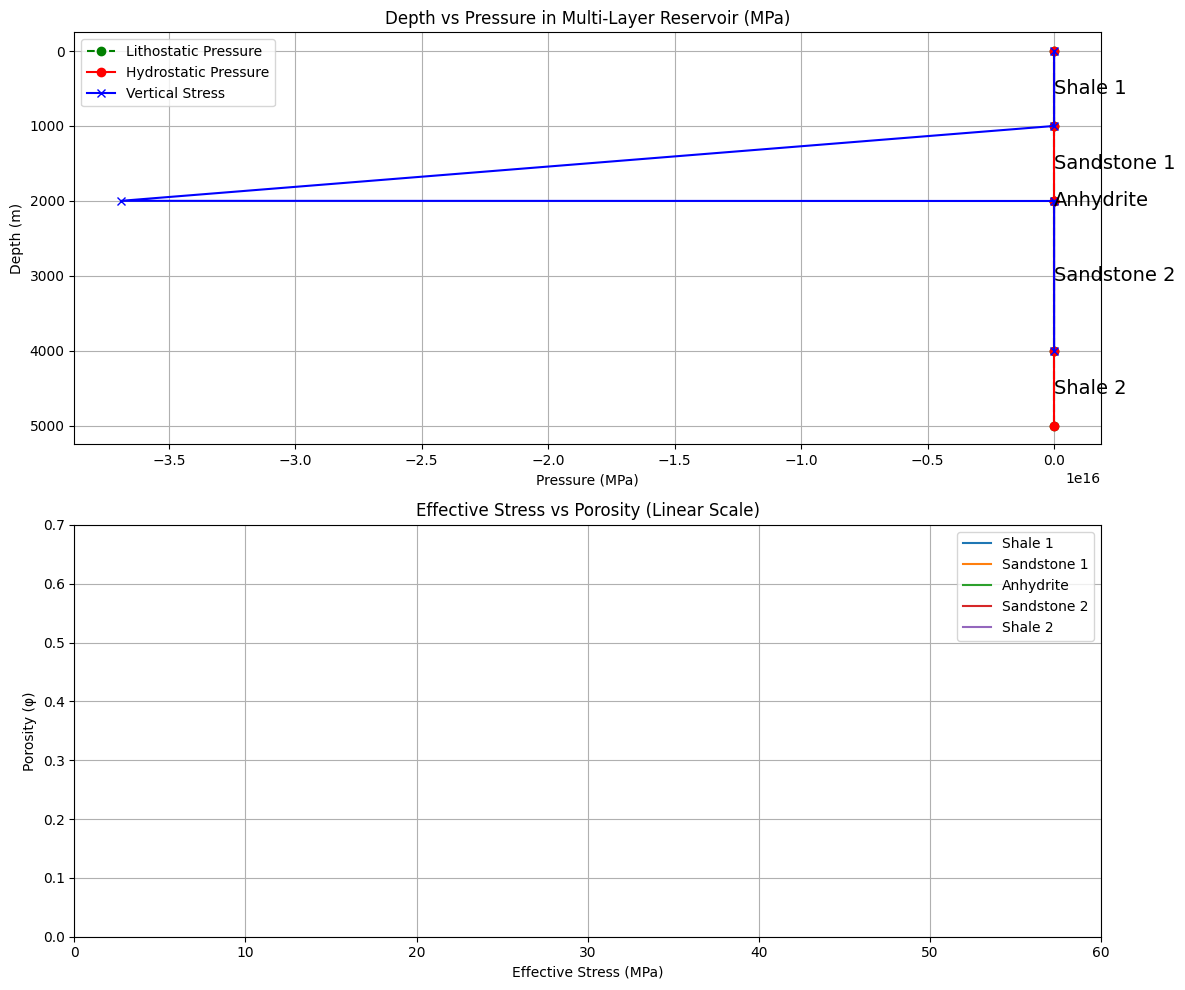

In [18]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s²)

# Given data
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses
# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)
print(depths)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer
# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1040  # Fluid density (kg/m³) - changed to match function parameter

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}

P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_final = 0  # Start with zero lithostatic pressure at the surface

# Functions for pressure calculations
def hydrostatic_pressure_single(depth, sea_level=0, sediment_surface=0, water_depth=0, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.
    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)
    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)
    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]
    # Convert pressure to MPa and return
    return pressure / 1e6

def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.
    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².
    Returns:
        float: Lithostatic pressure for the given layer (MPa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity)) / 1e6

def arty_model(phi, phi0, k):
    if phi0 <= 0 or k <= 0:
        raise ValueError("phi0 and k must be positive values.")
    return - (1 / k) * np.log(phi / phi0)

# Depths excluding the surface depth (0m)
depths_new = depths[1:]

# Set constants for water depth calculation
SEA_LEVEL = 0
SEDIMENT_SURFACE = 0
if SEDIMENT_SURFACE >= 0:
    WATER_DEPTH = SEDIMENT_SURFACE
else:
    WATER_DEPTH = SEA_LEVEL

for i in range(num_layers):
    print('Calculating pressures for layer:', i)
    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=fluid_density
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=fluid_density,
        g=g
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]:.2f} MPa, Lithostatic Pressure = {lith_pres[i]:.2f} MPa")

# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)

# Calculate vertical stress for each layer
vertical_stress = np.zeros(num_layers)
for i in range(num_layers):
    vertical_stress[i] = np.sum(rock_densities[:i+1] * g * layer_thicknesses[:i+1]) / 1e6

# Calculate effective stress using Artzy model

effective_stress = np.zeros(num_layers)
pore_pressure = np.zeros(num_layers)
phi0=0.4

for i in range(num_layers):
    print('Calculating pressures for layer:', i)
    # Calculate hydrostatic pressure for the current layer
    effective_stress[i] = arty_model(parameters['phi'][i],
                                     phi0,
                                     parameters['k'][i])

    # effective_stress[i] *= 1e6
    print(lithostatic_pressure[i], hydrostatic_pressure[i], effective_stress[i])

    pore_pressure[i] = (lithostatic_pressure[i] - hydrostatic_pressure[i]) - effective_stress[i]
print(effective_stress)
# Prepare the plot
plt.figure(figsize=(12, 10))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.subplot(2, 1, 1)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(pore_pressure, depths[:-1], linestyle='-', color='b', label='Vertical Stress', marker='x')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward
# Annotate each layer with its name
top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(P_l[i], depth, name, ha='left', va='center', fontsize=14, color='black')
plt.grid(True)
plt.legend(loc='best')

# Plotting effective stress against porosity in linear scale
plt.subplot(2, 1, 2)
# Change here: Use range(len(effective_stress)) to iterate
for i in range(len(effective_stress)):
    plt.plot(effective_stress[i], parameters['phi'][i], label=f'{layer_names[i]}')  # Assuming layer_names is defined
plt.title('Effective Stress vs Porosity (Linear Scale)')
plt.ylabel('Porosity (φ)')
plt.xlabel('Effective Stress (MPa)')
plt.xlim(0, 60)
plt.ylim(0, 0.7)
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# NEW

To calculate the pore pressure for each layer in a basin, we need to use the given pore pressure equation and the initial data provided. The general form of the pore pressure equation is:

$
\left( 1 - \frac{\varphi}{C} \right) \frac{\partial u}{\partial t} - \nabla \left( \frac{k}{\mu} \right) \cdot \nabla u = \left( 1 - \frac{\varphi}{C} \right) \frac{\partial u_l}{\partial t}
$

Given that this is a partial differential equation (PDE), solving it analytically can be quite complex. Instead, we will make some simplifying assumptions and perform numerical calculations for each layer.

*   subsection: Simplifying Assumptions

subsection*{Steady-State Condition}
Assume steady-state conditions where $\frac{\partial u}{\partial t} = 0$ and $\frac{\partial u_l}{\partial t} = 0$. This simplifies the equation to:
$
- \nabla \left( \frac{k}{\mu} \right) \cdot \nabla u = 0]
$

*   subsection: One-Dimensional Flow
Assume one-dimensional flow along the vertical direction $z$. Under these assumptions, the simplified PDE becomes:
$
- \frac{d}{dz} \left( \frac{k}{\mu} \frac{du}{dz} \right) = 0
$

Integrating this equation gives:
$
\frac{k}{\mu} \frac{du}{dz} = \text{constant}
$

Assuming constant $\frac{k}{\mu}$ within each layer, we get:
$
u(z) = u_0 + \frac{\mu}{k} q z
$

Where $q$ is the fluid flux per unit area and $u_0$ is the pressure at the top of the layer.

**section: Calculation Steps**

*   subsection: Calculate Hydrostatic Pressure

$
P_{\text{hydro}}(z) = \rho_{\text{fluid}} g z
$

subsection*{Calculate Lithostatic Pressure}
$
P_{\text{litho}}(z) = \int_0^z \rho_{\text{rock}}(z') g dz'
$

subsection*{Calculate Overburden Pressure}
$
P_{\text{overburden}}(z) = P_{\text{litho}}(z) - P_{\text{hydro}}(z)
$

subsection*{Solve for Pore Pressure}
Use the relation between overburden pressure and pore pressure:
$
u(z) = P_{\text{overburden}}(z) - \sigma_v(z)
$
Where $\sigma_v(z)$ is the effective vertical stress.



Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.4173, Hydrostatic Pressure = 10.21 MPa, Lithostatic Pressure = 19.71 MPa
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.2688, Hydrostatic Pressure = 20.42 MPa, Lithostatic Pressure = 41.96 MPa
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.44 MPa, Lithostatic Pressure = 42.02 MPa
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3492, Hydrostatic Pressure = 30.80 MPa, Lithostatic Pressure = 63.29 MPa
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.2575, Hydrostatic Pressure = 41.24 MPa, Lithostatic Pressure = 86.24 MPa
Calculating pressures for layer: 5
Layer 5: Rock Density = 2720, Porosity = 0.1064, Hydrostatic Pressure = 51.54 MPa, Lithostatic Pressure = 111.42 MPa
Overpressure [ 0.          9.49852546 21.54928642 21.58677435 32.48409026 45.00253513]
Calculat

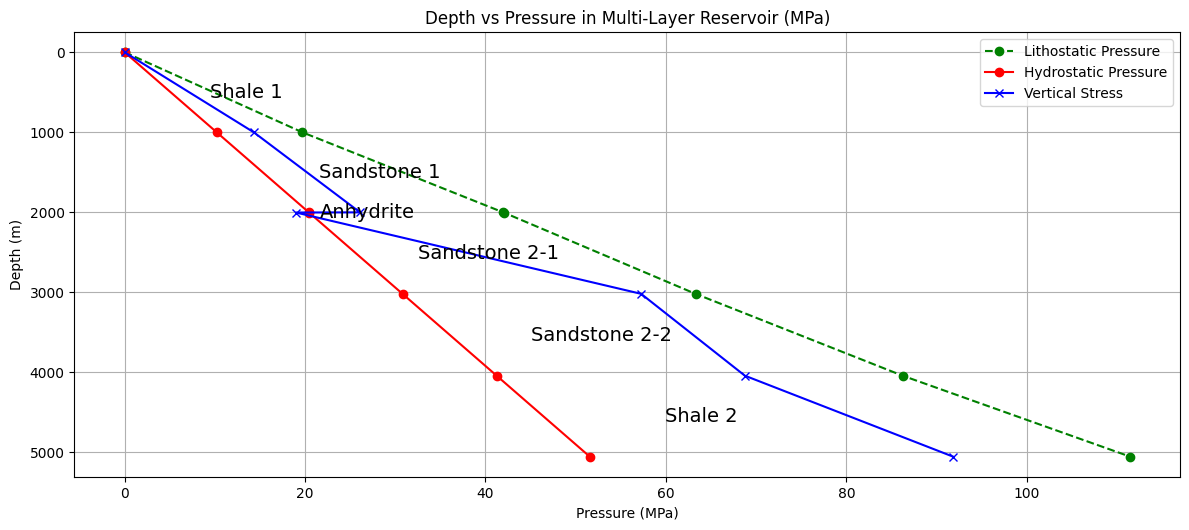

In [47]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s²)

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1001, 1000, 2, 1016, 1023, 1010])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2-1', 'Sandstone 2-2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1040  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
parameters = {
    'phi': np.array([0.4173, 0.2688, 0.01, 0.3492, 0.2575, 0.1064]),  # Porosity
    'phi0': np.array([0.70, 0.41, 0.1, 0.41, 0.41, 0.70]),
    'k': np.array([np.power(10.0, -2.26), np.power(10.0, 3.16), np.power(10.0, -16), np.power(10.0, 3.86), np.power(10.0, 3.06), np.power(10.0, -6.3)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.096, 0.0266, 0.1, 0.0266, 0.0266, 0.096]),  # Compressibility (1/MPa)
}


P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_final = 0  # Start with zero lithostatic pressure at the surface

# Functions for pressure calculations
def hydrostatic_pressure_single(depth, sea_level=0, sediment_surface=0, water_depth=0, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.
    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)
    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)
    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]
    # Convert pressure to MPa and return
    return pressure / 1e6

def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.
    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².
    Returns:
        float: Lithostatic pressure for the given layer (MPa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity)) / 1e6

def arty_model(phi, phi0, k):
    if phi0 <= 0 or k <= 0:
        raise ValueError("phi0 and k must be positive values.")
    return - (1 / k) * np.log(phi / phi0)

# Depths excluding the surface depth (0m)
depths_new = depths[1:]

# Set constants for water depth calculation
SEA_LEVEL = 0
SEDIMENT_SURFACE = 0
if SEDIMENT_SURFACE >= 0:
    WATER_DEPTH = SEDIMENT_SURFACE
else:
    WATER_DEPTH = SEA_LEVEL

for i in range(num_layers):
    print('Calculating pressures for layer:', i)
    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=fluid_density
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=fluid_density,
        g=g
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]:.2f} MPa, Lithostatic Pressure = {lith_pres[i]:.2f} MPa")

# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)

overpressure = np.zeros(num_layers)
for i in range(num_layers):
  overpressure[i] = lithostatic_pressure[i] - hydrostatic_pressure[i]


print('Overpressure', overpressure)
# # Calculate vertical stress for each layer
# vertical_stress = np.zeros(num_layers)
# for i in range(num_layers):
#     vertical_stress[i] = np.sum(rock_densities[:i+1] * g * layer_thicknesses[:i+1]) / 1e6

# # Calculate effective stress using Artzy model

effective_stress = np.zeros(num_layers+1)
pore_pressure = np.zeros(num_layers+1)

for i in range(num_layers):
    if i ==0:
      effective_stress[i] = 0
    print('Calculating pressures for layer:', i)
    print(i, parameters['phi'][i], parameters['phi0'][i], parameters['C'][i])
    # Calculate hydrostatic pressure for the current layer
    effective_stress[i+1] = arty_model(parameters['phi'][i],
                                     parameters['phi0'][i],
                                     parameters['C'][i])

    pore_pressure[i+1] = lithostatic_pressure[i+1] - effective_stress[i+1]


print(pore_pressure)
# Prepare the plot
plt.figure(figsize=(12, 10))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.subplot(2, 1, 1)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(pore_pressure, depths, linestyle='-', color='b', label='Vertical Stress', marker='x')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward
# Annotate each layer with its name
top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(P_l[i], depth, name, ha='left', va='center', fontsize=14, color='black')
plt.grid(True)
plt.legend(loc='best')

# # Plotting effective stress against porosity in linear scale
# plt.subplot(2, 1, 2)
# for lithology, stress in effective_stress.items():
#     plt.plot(stress, phi_array, label=f'{lithology.capitalize()}')
# plt.title('Effective Stress vs Porosity (Linear Scale)')
# plt.ylabel('Porosity (φ)')
# plt.xlabel('Effective Stress (MPa)')
# plt.xlim(0, 60)
# plt.ylim(0, 0.7)
# plt.grid(True)
# plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Calculating pressures for layer: 0 5.388280702561433
Calculating pressures for layer: 1 15.871787633434549
Calculating pressures for layer: 2 23.02585092994046
Calculating pressures for layer: 3 6.034298335823544
Calculating pressures for layer: 4 17.486369909570026
Calculating pressures for layer: 5 19.623695397248547
[ 5.3882807  15.87178763 23.02585093  6.03429834 17.48636991 19.6236954 ]


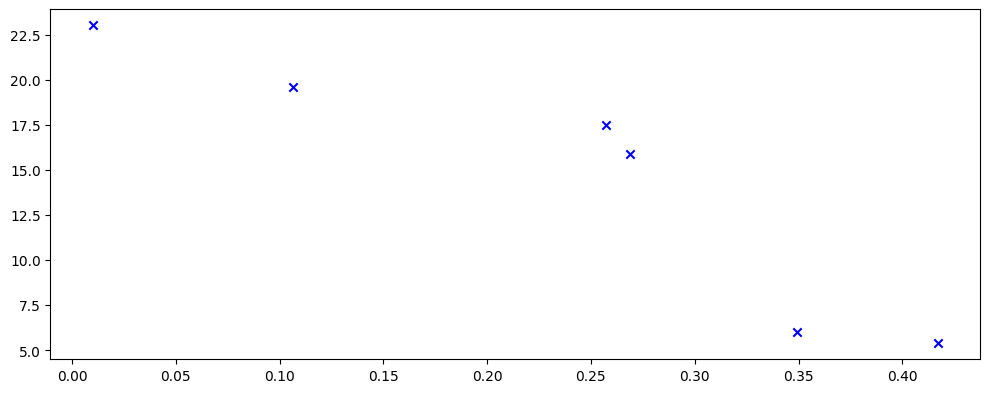

In [38]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s²)

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1001, 1000, 2, 1016, 1023, 1010])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2-1', 'Sandstone 2-2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1040  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
parameters = {
    'phi': np.array([0.4173, 0.2688, 0.01, 0.3492, 0.2575, 0.1064]),  # Porosity
    'phi0': np.array([0.70, 0.41, 0.1, 0.41, 0.41, 0.70]),
    'k': np.array([np.power(10.0, -2.26), np.power(10.0, 3.16), np.power(10.0, -10), np.power(10.0, 3.86), np.power(10.0, 3.06), np.power(10.0, -6.3)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.096, 0.0266, 0.1, 0.0266, 0.0266, 0.096]),  # Compressibility (1/MPa)
}


P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_final = 0  # Start with zero lithostatic pressure at the surface



effective_stress = np.zeros(num_layers)

def arty_model(phi, phi0, k):
    if phi0 <= 0 or k <= 0:
        raise ValueError("phi0 and k must be positive values.")
    return - (1 / k) * np.log(phi / phi0)

for i in range(num_layers):
    # Calculate hydrostatic pressure for the current layer
    effective_stress[i] = arty_model(parameters['phi'][i],
                                     parameters['phi0'][i],
                                     parameters['C'][i])
    print('Calculating pressures for layer:', i, effective_stress[i])

print(effective_stress)
# Prepare the plot
plt.figure(figsize=(12, 10))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.subplot(2, 1, 1)
plt.scatter(parameters['phi'], effective_stress, linestyle='-', color='b', label='Vertical Stress', marker='x')

plt.show()

In [ ]:
e

In [19]:
sandstone = {
    'porosity initial': 0.41,
    'decline angle': 0.0266,
    'k': 0.0266,
    'rock density': 2720,
    'compaction parameter': 0.31, #km-1
    'C0': 27.5,
    'Cm' : 1.15,
    'ka': 41.56, #GPa-1
    'kb': 17.81, #GPa-1
    'phi1': 0.20

}

shale = {
    'porosity initial': 0.70,
    'decline angle': 0.096,
    'k': 0.096,
    'rock density': 2700,
    'compaction parameter': 0.83, #km-1
    'C0': 403,
    'Cm' : 4.03,
    'ka': 191.57, #GPa-1
    'kb': 52.70, #GPa-1
    'phi1': 0.35
}

siltstone = {
    'porosity initial': 0.55,
    'decline angle': 0.049,
    'k': 0.049,
    'rock density': 2720,
    'compaction parameter': 0.51, #km-1
    'C0': 103,
    'Cm' : 2.11,
    'ka': 31.65, #GPa-1
    'kb': 86.11, #GPa-1
    'phi1': 0.28
}


# Create a list of the porosity values
porosity_values = [
    shale['porosity initial'],
    siltstone['porosity initial'],
    sandstone['porosity initial']
]

# Find the maximum porosity value
max_porosity = max(porosity_values)

min(porosity_values),max(porosity_values)


(0.41, 0.7)

Eq. (2.20)

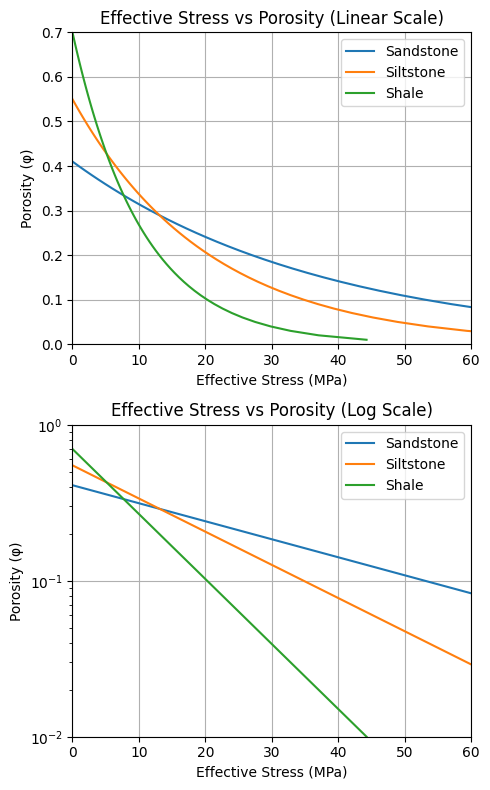

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def arty_model(phi_array, phi0, k):
    if phi0 <= 0 or k <= 0:
        raise ValueError("phi0 and k must be positive values.")

    return [- (1 / k) * np.log(phi / phi0) for phi in phi_array]


# List of lithology types
lithology_types = ['sandstone', 'siltstone', 'shale']

# Prepare the plot
plt.figure(figsize=(5, 8))

# Porosity array
phi_array = np.linspace(0.01, 1, 100)  # Start from a small positive value to avoid log(0)

# Iterate through each lithology type and calculate effective stress
for lithology in lithology_types:
    if lithology == 'sandstone':
        phi0 = sandstone['porosity initial']
        k = sandstone['k']
    elif lithology == 'siltstone':
        phi0 = siltstone['porosity initial']
        k = siltstone['k']
    elif lithology == 'shale':
        phi0 = shale['porosity initial']
        k = shale['k']

    # Calculate effective stress for the current lithology
    sigma_effective = arty_model(phi_array, phi0, k)

    # Plotting effective stress against porosity in linear scale
    plt.subplot(2, 1, 1)
    plt.plot(sigma_effective, phi_array, label=f'{lithology.capitalize()}')
    plt.title('Effective Stress vs Porosity (Linear Scale)')
    plt.ylabel('Porosity (φ)')
    plt.xlabel('Effective Stress (MPa)')
    plt.xlim(0, 60)
    plt.ylim(0, 0.7)
    plt.grid(True)
    plt.legend()

    # Plotting effective stress against porosity in logarithmic scale
    plt.subplot(2, 1, 2)
    plt.plot(sigma_effective, phi_array, label=f'{lithology.capitalize()}')
    plt.title('Effective Stress vs Porosity (Log Scale)')
    plt.ylabel('Porosity (φ)')
    plt.xlabel('Effective Stress (MPa)')
    plt.xlim(0, 60)
    plt.ylim(0.01, 1)  # Avoid log(0) by starting from a small positive value
    plt.yscale('log')   # Set y-axis to logarithmic scale
    plt.grid(True)
    plt.legend()

# Show the plots
plt.tight_layout()
plt.show()